In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder,StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\kadah\Downloads\archive (15)\Housing.csv")

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [6]:
#Statistical info
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
#for checking the data types of attributes
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Explore the dataset to understand its structure, handle missing values, and ensure data quality.

In [8]:
# check for null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
# percentage of null values in dataset
df.isnull().sum()/df.shape[0]*100

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

<Axes: >

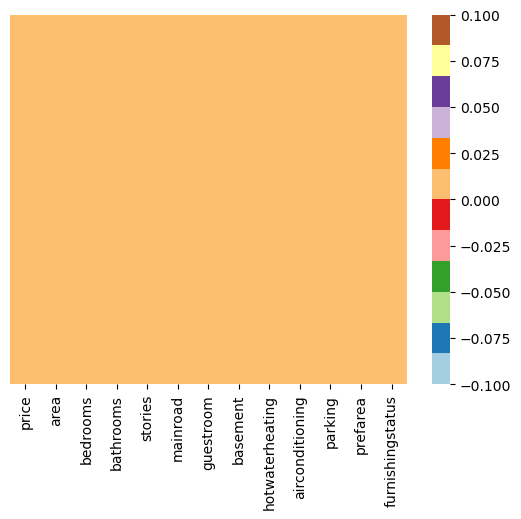

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="Paired") 

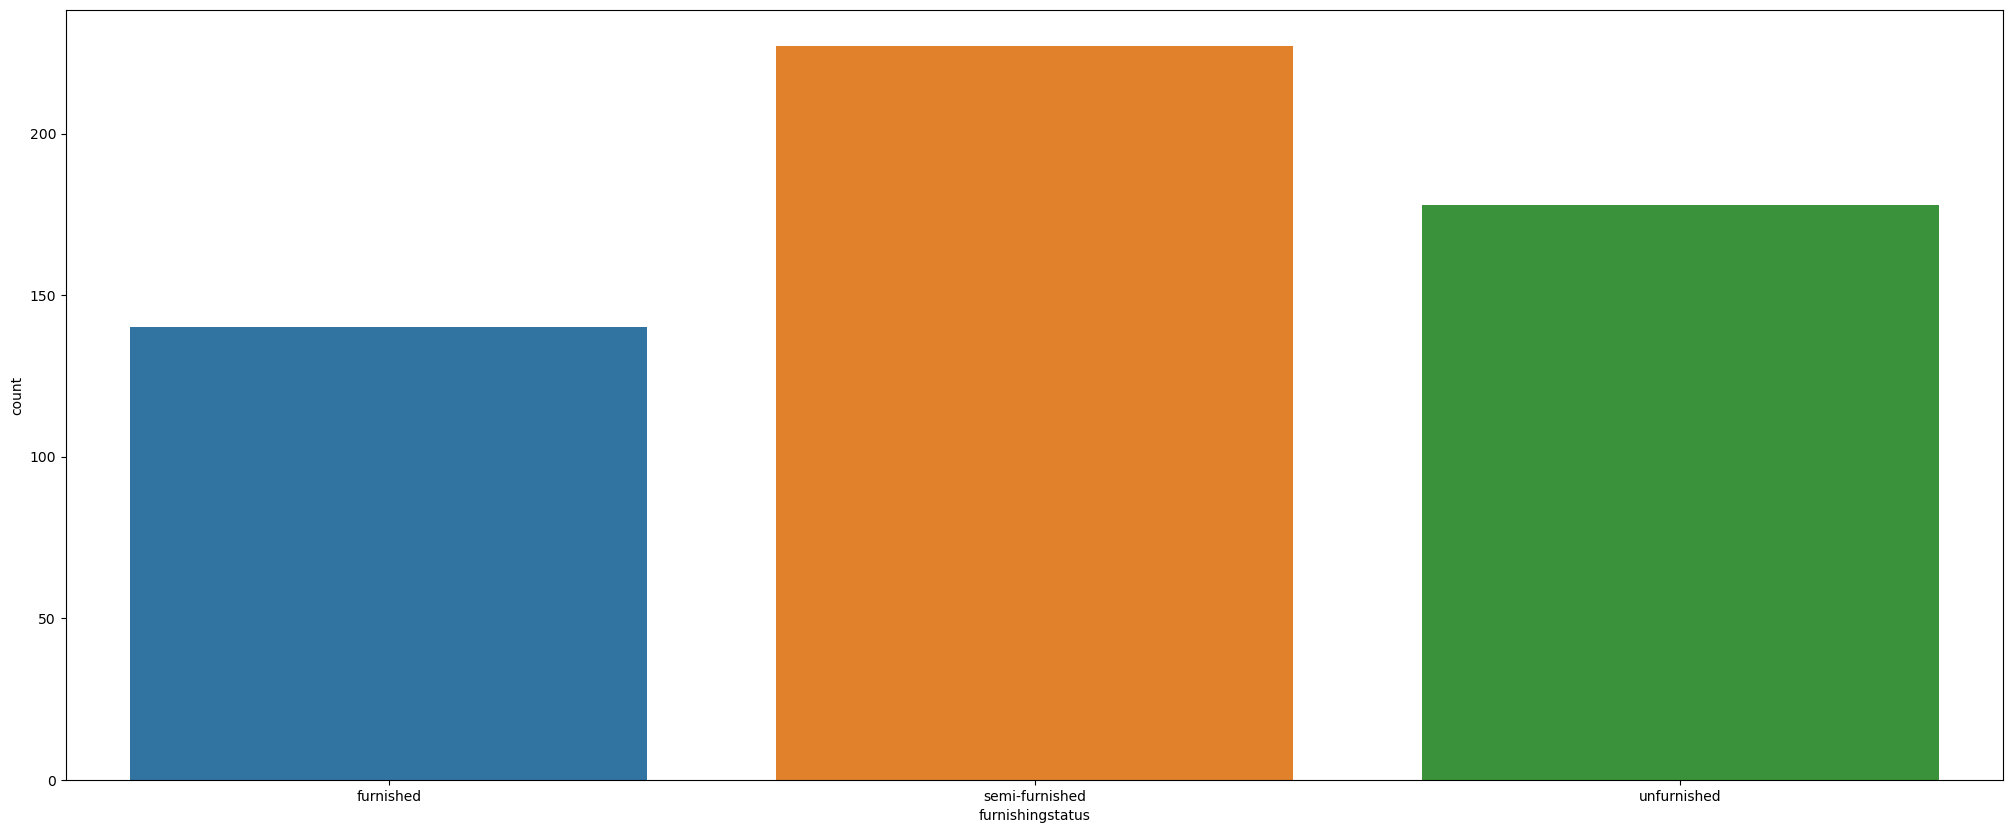

In [12]:
plt.figure(figsize=(25,10))
sns.countplot(x='furnishingstatus',data=df)
plt.show()

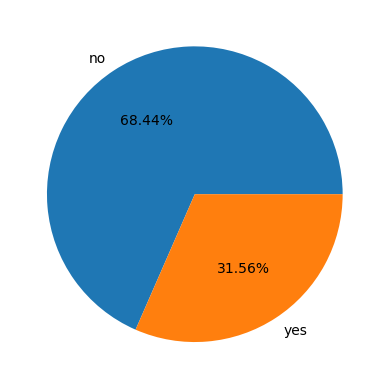

In [13]:
a=df.groupby("airconditioning")["airconditioning"].count()
plt.pie(a,labels=a.index,autopct="%.2f%%")
plt.show()

<Axes: xlabel='area', ylabel='Count'>

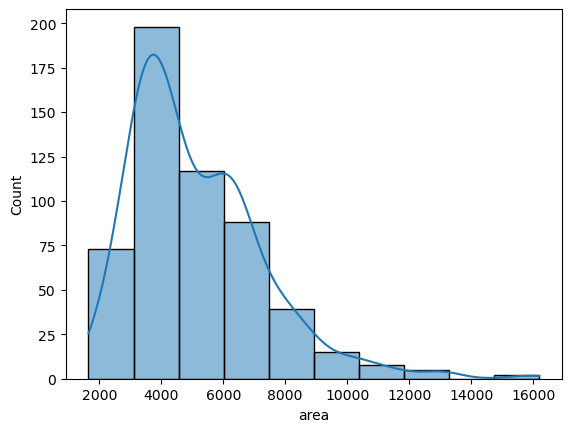

In [14]:
sns.histplot(df["area"],bins=10,kde=True)

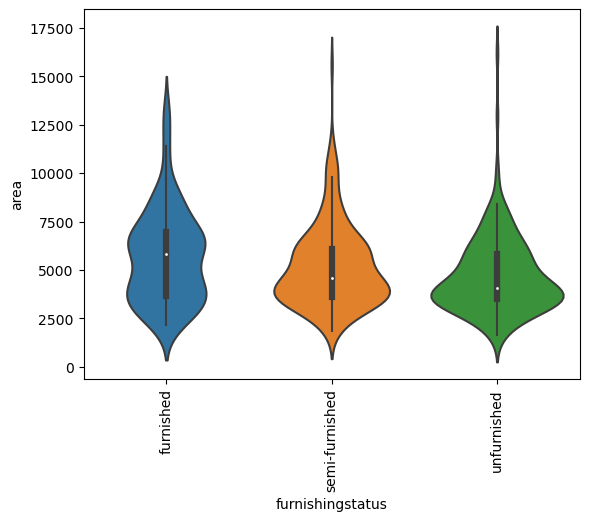

In [15]:
sns.violinplot(x="furnishingstatus",y="area",data=df)
plt.xticks(rotation=90)
plt.show()

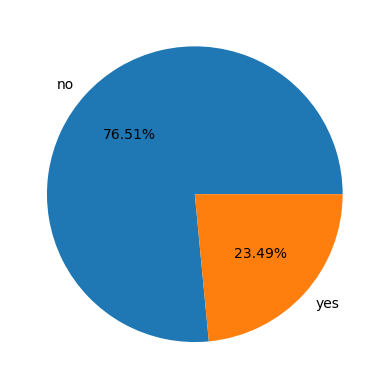

In [16]:
a=df.groupby("prefarea")["prefarea"].count()

plt.pie(a,labels=a.index,autopct="%.2f%%")
plt.show()

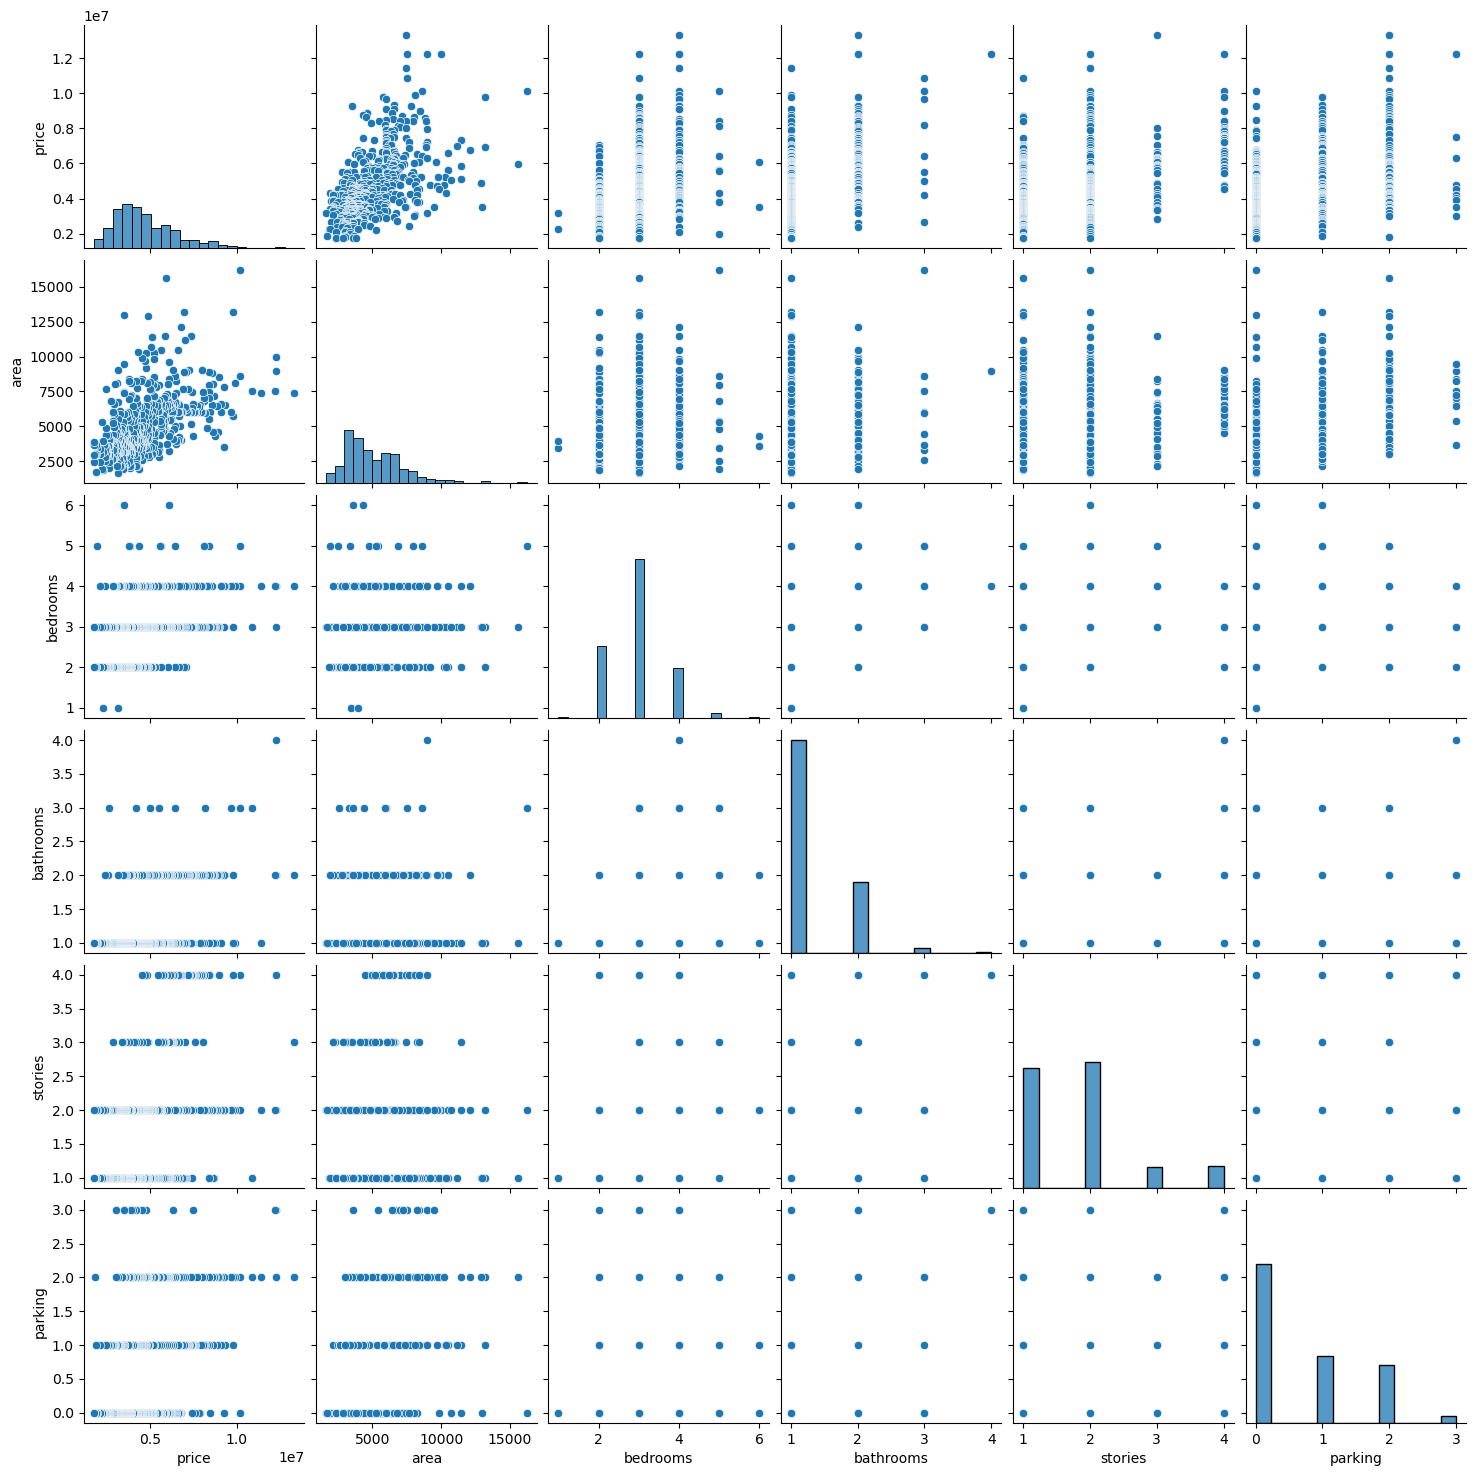

In [17]:
sns.pairplot(df)

In [23]:
b = df.sample(10)

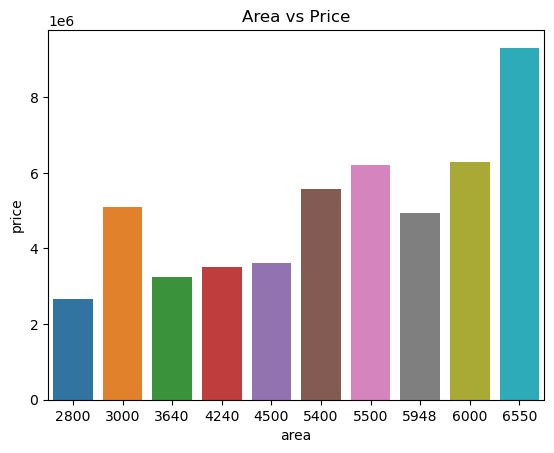

In [24]:
sns.barplot(x='area', y='price',data=b, orient='v')
plt.title ('Area vs Price')
plt.show()

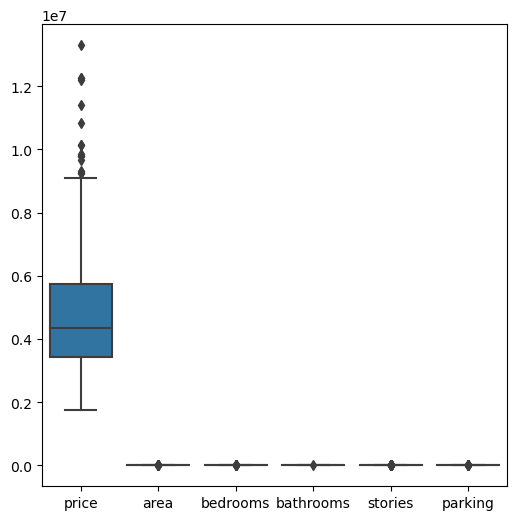

In [25]:
plt.figure(figsize=(6,6))
sns.boxplot(df)
plt.show()

In [26]:
# Removing outlier by using z-score method
columns = ['price']
z_scores = np.abs((df[columns] - df[columns].mean()) / df[columns].std())

df_cleaned_zscore = df[(z_scores < 3).all(axis=1)]

print(df_cleaned_zscore.head())

print(f"No of rows after outlier removal: {df_cleaned_zscore.shape[0]}")

       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
6   10150000   8580         4          3        4      yes        no       no   
7   10150000  16200         5          3        2      yes        no       no   
8    9870000   8100         4          1        2      yes       yes      yes   
9    9800000   5750         3          2        4      yes       yes       no   
10   9800000  13200         3          1        2      yes        no      yes   

   hotwaterheating airconditioning  parking prefarea furnishingstatus  
6               no             yes        2      yes   semi-furnished  
7               no              no        0       no      unfurnished  
8               no             yes        2      yes        furnished  
9               no             yes        1      yes      unfurnished  
10              no             yes        2      yes        furnished  
No of rows after outlier removal: 539


# Feature Selection: Identify relevant features that may contribute to the predictive model.

In [27]:
encoder = LabelEncoder()

In [28]:
df['mainroad'] = encoder.fit_transform(df['mainroad'])

df['guestroom'] = encoder.fit_transform(df['guestroom'])

df['basement'] = encoder.fit_transform(df['basement'])

df['hotwaterheating'] = encoder.fit_transform(df['hotwaterheating'])

df['airconditioning'] = encoder.fit_transform(df['airconditioning'])

df['prefarea'] = encoder.fit_transform(df['prefarea'])

df['furnishingstatus'] = encoder.fit_transform(df['furnishingstatus'])


In [29]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [30]:
X = df.drop('furnishingstatus',axis=1)
Y = df['furnishingstatus']
print(X)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  
0           0                0            

In [31]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

In [32]:
print(X.shape,X_train.shape, X_test.shape)

(545, 12) (436, 12) (109, 12)


In [33]:
from xgboost import XGBRegressor

In [34]:
regressor = XGBRegressor()

In [35]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Implement linear regression using a machine learning library

In [36]:
model=LinearRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

In [37]:
print(model.intercept_)

1.736375363590386


In [38]:
print(model.coef_)

[-1.31181445e-07 -9.67191675e-06 -1.69676450e-02  7.61351480e-02
  1.41608307e-02 -6.92369686e-02 -6.43564041e-02 -2.57999095e-02
 -9.81278628e-02  4.96321479e-02 -2.01034286e-02  5.70701688e-02]


# Evaluate the model's performance on a separate test dataset using metrics such as Mean Squared Error or R-squared.

In [39]:
mae = mean_absolute_error(Y_test,y_pred)
mse= mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
print('Mean Absolute Error',mae)
print('Mean Squared Error',mse)
print('Root Mean Absolute Error',rmse)
print('R2 Score',r2)

Mean Absolute Error 0.5939546906144778
Mean Squared Error 0.5428722327314506
Root Mean Absolute Error 0.7367986378458165
R2 Score 0.05399457361654958


In [40]:
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import Ridge,Lasso

In [41]:
lr_model=LinearRegression()
lr_scores=cross_val_score(lr_model,X_train,Y_train,cv=5)

In [42]:
lasso_model=Lasso(alpha=1.0)
lassso_scores=cross_val_score(lasso_model,X_train,Y_train,cv=5)

In [43]:
ridge_model=Ridge(alpha=1.0)
ridge_scores=cross_val_score(ridge_model,X_train,Y_train,cv=5)

In [44]:
lr_model.fit(X_train,Y_train)
lr_prediction =lr_model.predict(X_test)
lr_mae =mean_absolute_error(Y_test,lr_prediction)
lr_mse =mean_squared_error(Y_test,lr_prediction)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(Y_test,lr_prediction)
print('Linear mae',lr_mae)
print('Linear mse',lr_mse)
print('Linear rmse',lr_rmse)
print('Linear r2',lr_r2)

Linear mae 0.5939546906144778
Linear mse 0.5428722327314506
Linear rmse 0.7367986378458165
Linear r2 0.05399457361654958


In [45]:
lasso_model.fit(X_train,Y_train)
lasso_prediction =lasso_model.predict(X_test)
lasso_mae =mean_absolute_error(Y_test,lasso_prediction)
lasso_mse =mean_squared_error(Y_test,lasso_prediction)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(Y_test,lr_prediction)
print('Lasso mae',lasso_mae)
print('Lasso mse',lasso_mse)
print('Lasso rmse',lasso_rmse)
print('Lasso r2',lasso_r2)

Lasso mae 0.5903848756571723
Lasso mse 0.5432666516426572
Lasso rmse 0.7370662464410219
Lasso r2 0.05399457361654958


In [46]:
ridge_model.fit(X_train,Y_train)
ridge_prediction =ridge_model.predict(X_test)
ridge_mae =mean_absolute_error(Y_test,ridge_prediction)
ridge_mse =mean_squared_error(Y_test,ridge_prediction)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(Y_test,ridge_prediction)
print('ridge mae',ridge_mae)
print('ridge mse',ridge_mse)
print('ridge rmse',ridge_rmse)
print('ridge r2',ridge_r2)

ridge mae 0.5938354102350919
ridge mse 0.5426114630612264
ridge rmse 0.7366216553029286
ridge r2 0.05444898905391149


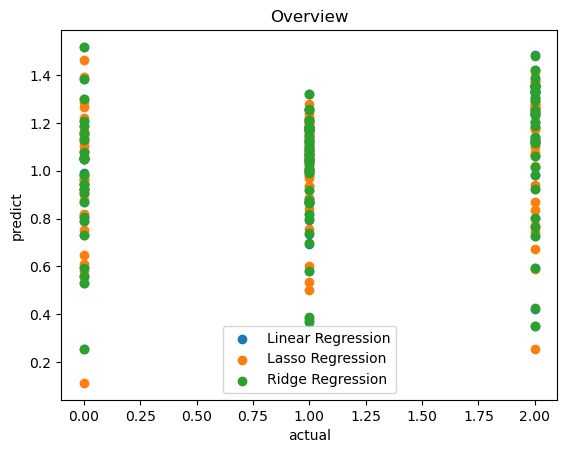

In [47]:
plt.scatter(Y_test,lr_prediction,alpha=1.0,label='Linear Regression')
plt.scatter(Y_test,lasso_prediction,alpha=1.0,label='Lasso Regression')
plt.scatter(Y_test,ridge_prediction,alpha=1.0,label='Ridge Regression')
plt.xlabel('actual')
plt.ylabel('predict')
plt.title('Overview')
plt.legend()